In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
#data
x_train_smpl = "x_train_gr_smpl_reduced.csv"
x_test_smpl = "x_test_gr_smpl_reduced.csv"
y_train_smpl = "y_train_smpl.csv"
y_test_smpl = "y_test_smpl.csv"

x_train_data = pd.read_csv(x_train_smpl)
y_train_data = pd.read_csv(y_train_smpl)
x_test_data = pd.read_csv(x_test_smpl)
y_test_data = pd.read_csv(y_test_smpl)

X_train = x_train_data.values
y_train = y_train_data.values.ravel()

X_test = x_test_data.values
y_test = y_test_data.values.ravel()

class_names = np.array(['20 kph','30 kph','50 kph','60 kph','70 kph','left turn', 'right turn',
                'predestrian crossing', 'children', 'cycle route ahead'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9689, 1225), (9689,), (3089, 1225), (3089,))

In [17]:
image_size = 35
num_labels = class_names.size
num_channels = 1

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_test, y_test = reformat(X_test, y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9689, 35, 35, 1), (9689, 10), (3089, 35, 35, 1), (3089, 10))

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=3, activation= 'relu', input_shape=(35,35,1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(10, activation= 'softmax'))

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 9689 samples, validate on 3089 samples
Epoch 1/10
9689/9689 [==============================] - 12s 1ms/sample - loss: 1.3417 - accuracy: 0.6981 - val_loss: 0.5603 - val_accuracy: 0.8734
Epoch 2/10
9689/9689 [==============================] - 12s 1ms/sample - loss: 0.1998 - accuracy: 0.9510 - val_loss: 0.4015 - val_accuracy: 0.9382
Epoch 3/10
9689/9689 [==============================] - 12s 1ms/sample - loss: 0.1116 - accuracy: 0.9730 - val_loss: 0.3374 - val_accuracy: 0.9446
Epoch 4/10
9689/9689 [==============================] - 13s 1ms/sample - loss: 0.0849 - accuracy: 0.9802 - val_loss: 0.3125 - val_accuracy: 0.9586
Epoch 5/10
9689/9689 [==============================] - 12s 1ms/sample - loss: 0.0668 - accuracy: 0.9814 - val_loss: 0.3944 - val_accuracy: 0.9323
Epoch 6/10
9689/9689 [==============================] - 12s 1ms/sample - loss: 0.0662 - accuracy: 0.9839 - val_loss: 0.3401 - val_accuracy: 0.9401
Epoch 7/10
9689/9689 [==============================] - 12s 1ms/sample

3089/3089 - 1s - loss: 0.6231 - accuracy: 0.9272


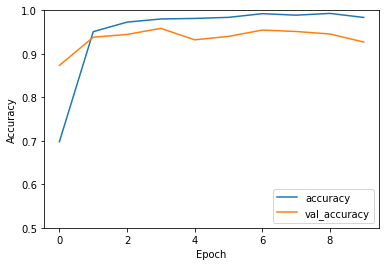

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [8]:
pred_probs = np.argmax(y_test, axis=1)

pred_class = model.predict_classes(X_test, verbose=0)
pred_class.flatten()

pred_probs.shape, pred_class.shape, pred_class[1], pred_probs[1]

((3089,), (3089,), 6, 6)

In [9]:
print(classification_report(pred_probs, pred_class))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83        60
           1       0.91      0.96      0.93       719
           2       0.97      0.96      0.96       750
           3       0.92      0.97      0.94       450
           4       0.96      0.97      0.96       660
           5       1.00      1.00      1.00        60
           6       1.00      0.98      0.99        90
           7       1.00      0.50      0.67        60
           8       1.00      0.49      0.66       150
           9       0.56      1.00      0.72        90

    accuracy                           0.93      3089
   macro avg       0.93      0.85      0.87      3089
weighted avg       0.94      0.93      0.92      3089



In [10]:
cm = confusion_matrix(pred_probs, pred_class, labels = np.unique(pred_probs))

print(cm)

[[ 54   1   0   0   5   0   0   0   0   0]
 [  6 694   7   1  10   0   0   0   0   1]
 [  0   7 735   3   5   0   0   0   0   0]
 [  0   1   1 447   1   0   0   0   0   0]
 [  1   6   2   0 649   0   1   0   0   1]
 [  0   0   0   0   0  60   0   0   0   0]
 [  0   0   0   0   0   0  89   0   0   1]
 [  0   0   0   0   0   0   0  60   0   0]
 [  0   0   0   1   0   0   2   0 129  18]
 [  0   0   0   0   0   0   0   0   0  90]]
